In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
from collections import Counter, defaultdict

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})

# Motivating Hypotetical: Data Sciencester 

## Finding Key Connectors

In [4]:
users = [
  {"id": 0, "name": "Hero"},
  {"id": 1, "name": "Dunn"},
  {"id": 2, "name": "Sue"},
  {"id": 3, "name": "Chi"},
  {"id": 4, "name": "Thor"},
  {"id": 5, "name": "Clive"},
  {"id": 6, "name": "Hicks"},
  {"id": 7, "name": "Devin"},
  {"id": 8, "name": "Kate"},
  {"id": 9, "name": "Klein"}
]

In [5]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

### Draw a graph for the DataSciencester network

The DataSciencester network


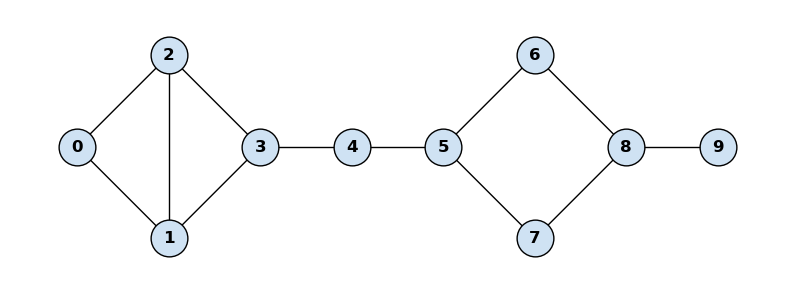

In [20]:
G = nx.Graph()
[G.add_node(user["id"]) for user in users]
G.add_edges_from(friendship_pairs)

fig, ax = plt.subplots(figsize=(10, 10))

node_pos = {
  0: (0, 2), 1: (1, 1), 2: (1, 3), 3: (2, 2), 4: (3, 2),
  5: (4, 2), 6: (5, 3), 7:(5, 1), 8: (6, 2), 9: (7, 2)}

nx.draw(G, pos=node_pos, with_labels=True, font_weight="bold", 
  node_color="#cfe2f3", node_size=700, 
  edgecolors="k", ax=ax)

# nx.draw(G, with_labels=True, font_weight="bold", 
#   node_color="#cfe2f3", node_size=700, 
#   edgecolors="k", ax=ax)

ax.set_aspect("equal")
ax.set_ylim([0.6, 3.5])
# ax.set_title("The DataSciencester network")

print("The DataSciencester network")
plt.show(fig)

In [21]:
# Initialize the dict with an empty list for each user id:
friendships = {user["id"]: [] for user in users}

# And loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
  friendships[i].append(j)      # Add j as a friend of user i
  friendships[j].append(i)      # Add i as a friend of user j

friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

### Average connections
First we find the *total* number of connections, by summing up the lengths of all the `friends` list:

In [24]:
def number_of_friends(user):
  """How many friends does `user` have?""" 
  user_id = user["id"]
  friend_ids = friendships[user_id]
  return len(friend_ids)

total_connections = sum(number_of_friends(user) for user in users)
print(f"total_connections: {total_connections}")

num_users = len(users)                              # length of the users list
avg_connections = total_connections / num_users     # 24 / 10 == 2.4
print(f"avg_connections: {avg_connections}")


total_connections: 24
avg_connections: 2.4


Find the most connected people

In [9]:
# Create a list (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

num_friends_by_id.sort(
  key=lambda id_and_friends: id_and_friends[1],
  reverse=True)

print(f"num_friends_by_id: {num_friends_by_id}")

num_friends_by_id: [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


### Draw the network with degree centrality

The DataSciencester network sized by degree


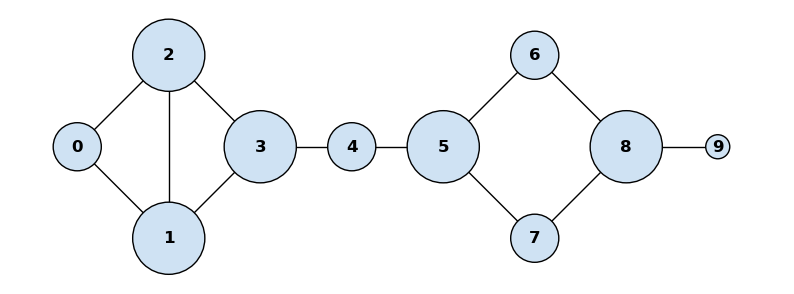

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

friend_size_id_sort = num_friends_by_id.copy()
friend_size_id_sort.sort(key= lambda id_and_friends: id_and_friends[0])

node_pos = {
  0: (0, 2), 1: (1, 1), 2: (1, 3), 3: (2, 2), 4: (3, 2),
  5: (4, 2), 6: (5, 3), 7:(5, 1), 8: (6, 2), 9: (7, 2)}
nx.draw(G, pos=node_pos, nodelist=G.nodes, 
  node_size=[300*size**2 for (_, size) in friend_size_id_sort],
  with_labels=True, font_weight="bold", 
  node_color="#cfe2f3", edgecolors="k", ax=ax)

ax.set_aspect("equal")
ax.set_ylim([0.5, 3.5])
print("The DataSciencester network sized by degree")
plt.show(fig)

## Data Scientists You May Know

In [11]:
def foaf_ids_bad(user):
  """foaf is short for "friend of a friend" """
  return [foaf_id 
          for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]]

foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

It  includes user 0 twice, since Hero is indeed friends with both of his friends includes users 1 and 2, although they are both friends with Hero already.
And it includes user 3 twice, as Chi is reachable through two different friends:

In [12]:
print(friendships[0])   # we have the friends of user 0: 1 and 2

# input the friends of user 0
print(friendships[1])
print(friendships[2])

[1, 2]
[0, 2, 3]
[0, 1, 3]


Produce a *count* of mutual friends and exclude people already know to the user:

In [13]:
def friends_of_friends(user):
  user_id = user["id"]
  return Counter(
    foaf_id 
    for friend_id in friendships[user_id]           # For each of my friends
      for foaf_id in friendships[friend_id]         # find their friends
        if foaf_id != user_id                       # who aren't me
          and foaf_id not in friendships[user_id]   # and aren't my friends
  )

In [14]:
print(friends_of_friends(users[0]))
print(friends_of_friends(users[3]))

Counter({3: 2})
Counter({0: 2, 5: 1})


This correctly tells Hero (`id` 0) has two mutual friends with Chi (`id` 3).

The second print out tell us that Chi (`id` 3) has two mutual friends with Hero (`id` 0) but only one mutual friend with Clive (`id` 5)

The next step uses the data of a list of pairs of `user_id` and `interest`

In [28]:
interests = [
  (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
  (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
  (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
  (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
  (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
  (3, "statistics"), (3, "regression"), (3, "probability"),
  (4, "machine learning"), (4, "regression"), (4, "decision trees"),
  (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
  (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
  (6, "probability"), (6, "mathematics"), (6, "theory"),
  (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
  (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
  (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
  (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [29]:
def data_scientists_who_like(target_interest):
  """Find the ids of all users who like the target interes."""
  return [user_id
          for user_id, user_interest in interests
            if user_interest == target_interest]

data_scientists_who_like("Hadoop")

[0, 9]

The above function is not efficient because its examines the whole
list of interests for every search. It is probably better off building
and index from interest to users.

In [31]:
# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [32]:
# Keys are user_ids, values are list of interest for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
  interests_by_user_id[user_id].append(interest)

interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

Find the one who has the most interests in common with a given user:

In [33]:
def most_common_interests_with(user):
  return Counter(
    interested_user_id
    for interest in interests_by_user_id[user["id"]]              # iterate over the user's interests
      for interested_user_id in user_ids_by_interest[interest]    # iterate over the other users with that interests
        if interested_user_id != user["id"]                       # keep count of how many times we see each other user
  )

In [34]:
most_common_interests_with(users[0])

Counter({9: 3, 8: 1, 1: 2, 5: 1})

This shows that Hero (`id` 0) has most common interest with Klein (`id` 9)
and its number of common interests is three things: `Hadoop`, `Java`, and `Big Data`. The remaining three users has single common interest with Hero.

## Salaries and Experience

The data is containing user's `salary` (in dollars) and `tenure` 
as a data scientist (in years)

In [35]:
salaries_and_tenures = [(83_000, 8.7), (88_000, 8.1),
                        (48_000, 0.7), (76_000, 6),
                        (69_000, 6.5), (76_000, 7.5),
                        (60_000, 2.5), (83_000, 10),
                        (48_000, 1.9), (63_000, 4.2)]

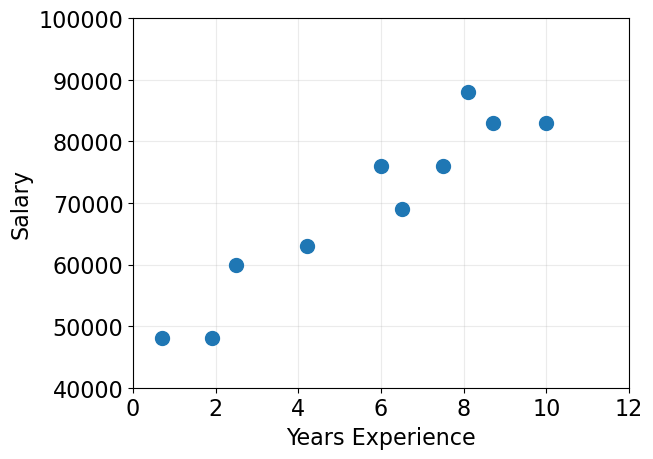

In [36]:
fig, ax = plt.subplots()

x_data = [tenure for _, tenure in salaries_and_tenures]
y_data = [salary for salary, _ in salaries_and_tenures]
ax.plot(x_data, y_data, linestyle="None", marker=".", 
  markersize=20)

ax.set_xlabel("Years Experience")
ax.set_ylabel("Salary")
ax.grid("on")

ax.set_xlim([0, 12])
ax.set_ylim([40_000, 100_000])

plt.show(fig)

### A fun fact about this data

In [37]:
# Keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)
print(salary_by_tenure)
# Keys are years, each value is average salary for that tenure.
average_salary_by_tenure = {
  tenure: sum(salaries) / len(salaries)
  for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

defaultdict(<class 'list'>, {8.7: [83000], 8.1: [88000], 0.7: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 2.5: [60000], 10: [83000], 1.9: [48000], 4.2: [63000]})


{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

It might be more helpful to bucket the tenures:

In [24]:
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
    return "more than five"

In [25]:
# Keys are tenure buckets, values are lists of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)

# Keys are tenure buckets, values are average salary for that bucket.
average_salary_by_bucket = {
  tenure_bucket: sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

display(average_salary_by_bucket)

print((average_salary_by_bucket["more than five"] 
  / average_salary_by_bucket["less than two"] - 1) * 100)

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

64.93055555555556


And we have a soundbite: "Data scientists with more than five years' experience earn 65% more than data scientists with little or no experience!"

## Paid Accounts

In [26]:
experience_and_paid = [
  (0.7, "paid"),
  (1.9, "unpaid"),
  (2.5, "paid"),
  (4.2, "unpaid"),
  (6.0, "unpaid"),
  (6.5, "unpaid"),
  (7.5, "unpaid"),
  (8.1, "unpaid"),
  (8.7, "paid"),
  (10.0, "paid")]

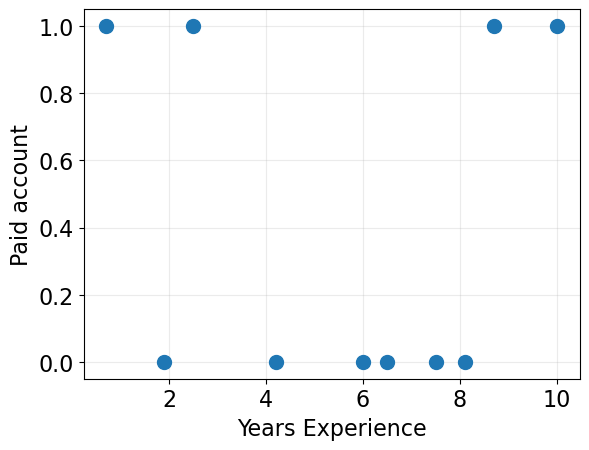

In [27]:
fig, ax = plt.subplots()

x_data = [experience for experience, _ in experience_and_paid]
y_data = [1 if paid == "paid" else 0 for _, paid in experience_and_paid]

ax.plot(x_data, y_data, linestyle="None", marker=".", 
  markersize=20)

ax.set_xlabel("Years Experience")
ax.set_ylabel("Paid account")
ax.grid("on")

# ax.set_xlim([0, 12])
# ax.set_ylim([40_000, 100_000])

plt.show(fig)



With more data (and more mathematics), we could build a model predicting
the likelihood that a user would pay based on his years of experience

## Topic of Interests

In [1]:
interests = [
  (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
  (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
  (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
  (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
  (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
  (3, "statistics"), (3, "regression"), (3, "probability"),
  (4, "machine learning"), (4, "regression"), (4, "decision trees"),
  (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
  (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
  (6, "probability"), (6, "mathematics"), (6, "theory"),
  (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
  (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
  (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
  (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

Count the words

In [28]:
# - lowercase each interest
# - split it into words
# - count the results
words_and_counts = Counter(
  word for user, interest in interests
    for word in interest.lower().split())

In [29]:
for word, count in words_and_counts.most_common():
  if count > 1:
    print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
